In [ ]:
## Em SPAM DETECTION WITH MACHINE LEARNING

In [34]:
#importing necessary libraries
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
df = pd.read_csv('spam.csv' , encoding = 'ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [36]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [37]:
df.size 

27860

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [39]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [40]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [41]:
df=df.rename(columns={'v1':'Target','v2':'Message'})
df.isnull().sum()

Target     0
Message    0
dtype: int64

In [42]:
df.duplicated().sum()

403

In [43]:
df.drop_duplicates(keep='first',inplace=True)

In [44]:
df.duplicated().sum()

0

In [45]:
df.size 

10338

In [46]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Target']=encoder.fit_transform(df['Target'])
df['Target']

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Target, Length: 5169, dtype: int32

In [47]:
df.head()

,Target,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


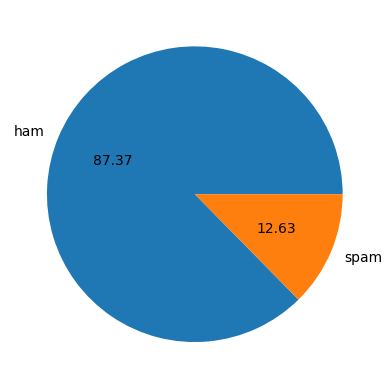

In [48]:
plt.pie(df['Target'].value_counts(), labels = ['ham', 'spam'], autopct = "%0.2f")
plt.show()

In [49]:
x=df['Message']
y=df['Target']

In [50]:
print(x)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5169, dtype: object


In [51]:
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Target, Length: 5169, dtype: int32

In [52]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=3)

In [53]:
from sklearn.feature_extraction.text import  CountVectorizer
from sklearn import svm

In [54]:
cv=CountVectorizer()

In [55]:
x_train_cv = cv.fit_transform(x_train)
x_test_cv = cv.transform(x_test)

In [56]:
print(x_train_cv)

  (0, 6647)	1
  (0, 2866)	1
  (0, 1642)	1
  (0, 3181)	1
  (0, 3996)	3
  (0, 3502)	1
  (0, 824)	2
  (0, 1312)	1
  (0, 5869)	1
  (0, 5683)	1
  (0, 5231)	1
  (0, 2082)	1
  (0, 4226)	2
  (0, 3766)	2
  (0, 6364)	1
  (0, 2888)	1
  (0, 4722)	1
  (0, 1709)	1
  (0, 5373)	1
  (0, 2351)	1
  (0, 3704)	1
  (0, 2404)	1
  (0, 3613)	1
  (0, 1420)	1
  (0, 2516)	1
  :	:
  (3358, 781)	1
  (3358, 956)	1
  (3358, 4287)	1
  (3358, 4191)	1
  (3358, 2735)	1
  (3358, 1350)	1
  (3358, 3648)	1
  (3358, 6515)	1
  (3358, 1728)	1
  (3358, 1105)	1
  (3358, 5176)	1
  (3358, 5757)	1
  (3358, 3557)	1
  (3358, 2057)	1
  (3358, 5958)	1
  (3358, 1452)	1
  (3358, 4488)	1
  (3358, 1419)	1
  (3358, 5747)	1
  (3358, 5492)	1
  (3358, 5400)	1
  (3358, 3230)	1
  (3358, 5386)	1
  (3358, 3159)	1
  (3358, 4166)	1


In [57]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression() 

In [58]:
lr.fit(x_train_cv,y_train)
prediction_train=lr.predict(x_train_cv)

In [59]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, prediction_train)*100)

99.76183387913069


In [60]:
prediction_test = lr.predict(x_test_cv)

In [61]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, prediction_test)*100)

97.29281767955801
